# Machine Learning

Based on Chapter 5 from *Python for Data Science Handbook*, by Jake VanderPlas.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


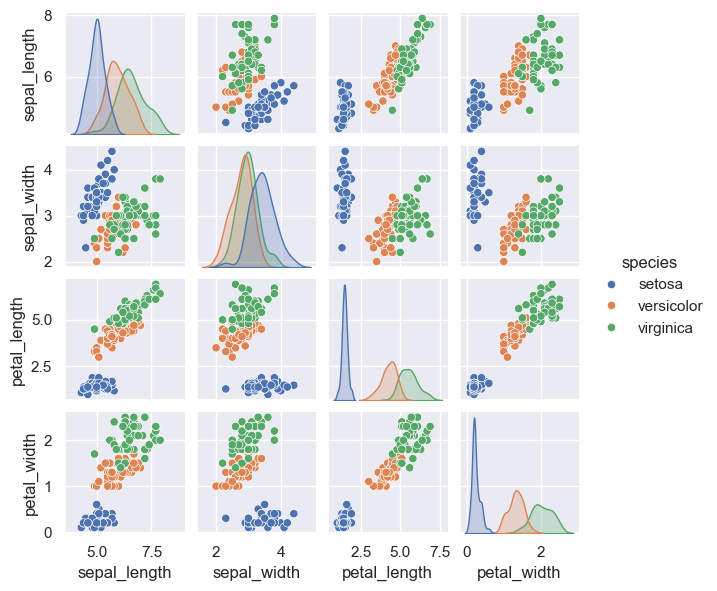

In [3]:
sns.pairplot(iris, hue='species', height=1.5);

In [4]:
X_iris = iris.drop('species', axis=1)

X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']

y_iris.shape

(150,)

To summarize, the expected layout of features and target values is visualized in the following diagram:

<left>
    <img src="images/Features.jpg" width="400" />
</left>

# Simple Linear Regression

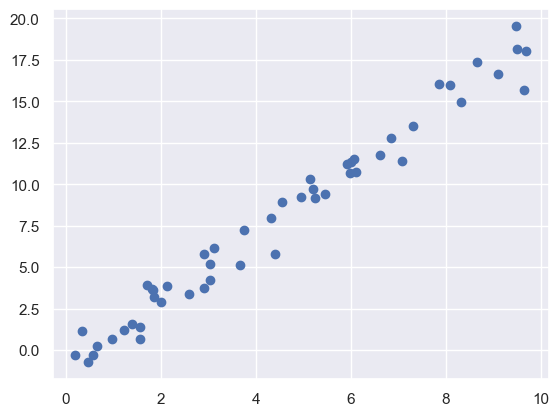

In [6]:
rng = np.random.RandomState(42)

x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

plt.scatter(x, y);

In [7]:
from sklearn.linear_model import LinearRegression

For our linear regression example, we can instantiate the `LinearRegression` class and specify that we would like to fit the intercept using the `fit_intercept` hyperparameter:

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

The Scikit-Learn API makes very clear the distinction between choice of model and application of model to data.

In [9]:
# x has shape (50,), i.e., a 1-dimensional array with 5o elements

X = x[:, np.newaxis]   # change the shape of an array in NumPy

X.shape

(50, 1)

Now it is time to apply our model to data. This can be done with the `fit()` method of the model:

In [10]:
# Fit the model to your data
model.fit(X, y)

LinearRegression()

This `fit()` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the `fit()` process have trailing underscores; for example in this linear model, we have the following:

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311164

These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

### Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the `predict()` method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [13]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [14]:
Xfit = xfit[:, np.newaxis]

yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

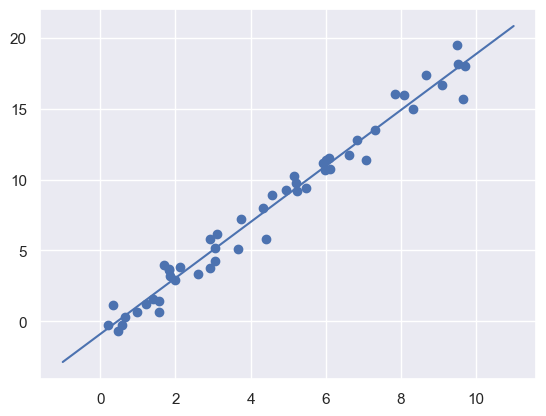

In [15]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

# Supervised learning example: Iris classification

We will use an extremely simple generative model known as **Gaussian Naive Bayes**, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution. Because it is so fast and has no hyperparameters to choose, Gaussian Naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the `train_test_split` utility function:

In [16]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [17]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class

model = GaussianNB()                       # 2. instantiate model

model.fit(Xtrain, ytrain)                  # 3. fit model to data

y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true value:

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

# Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis, which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [19]:
from sklearn.decomposition import PCA  # 1. Choose the model class

model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters

model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!

X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn's lmplot to show the results:

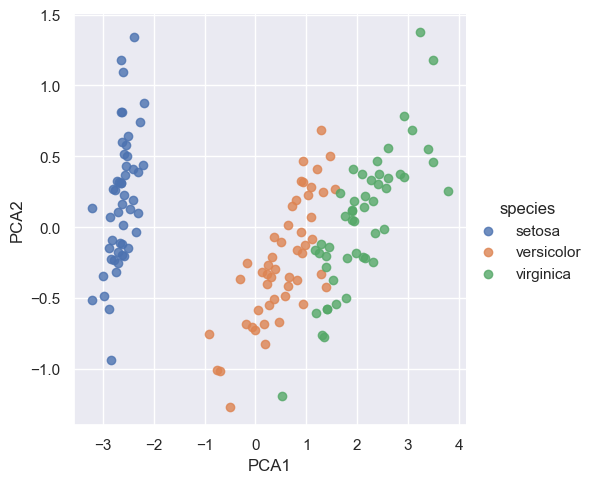

In [20]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot(x="PCA1", y="PCA2", hue="species", data=iris, fit_reg=False);

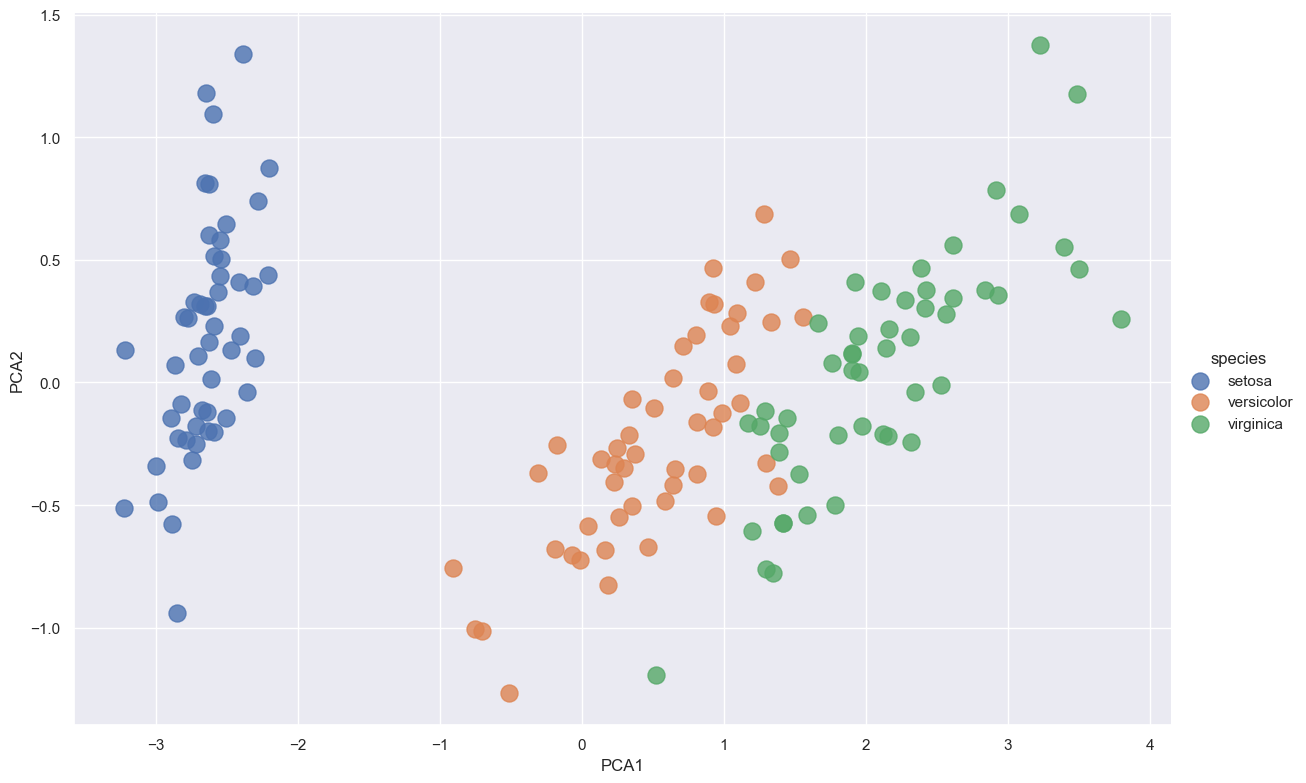

In [21]:
# 'height' and 'aspect' parameters to control the size of the facets
# 'scatter_kws' to control the size of the points

sns.lmplot(x="PCA1", y="PCA2", hue="species", data=iris, fit_reg=False, height=8, aspect=1.5, scatter_kws={'s': 150});

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

# Unsupervised learning: Iris clustering

Let's next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM). A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [22]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class

model = GaussianMixture(n_components=3,
                        covariance_type='full')  # 2. Instantiate the model with hyperparameters

model.fit(X_iris)                                # 3. Fit to data. Notice y is not specified!

y_gmm = model.predict(X_iris)                    # 4. Determine cluster labels

As before, we will add the cluster label to the Iris DataFrame and use Seaborn to plot the results:

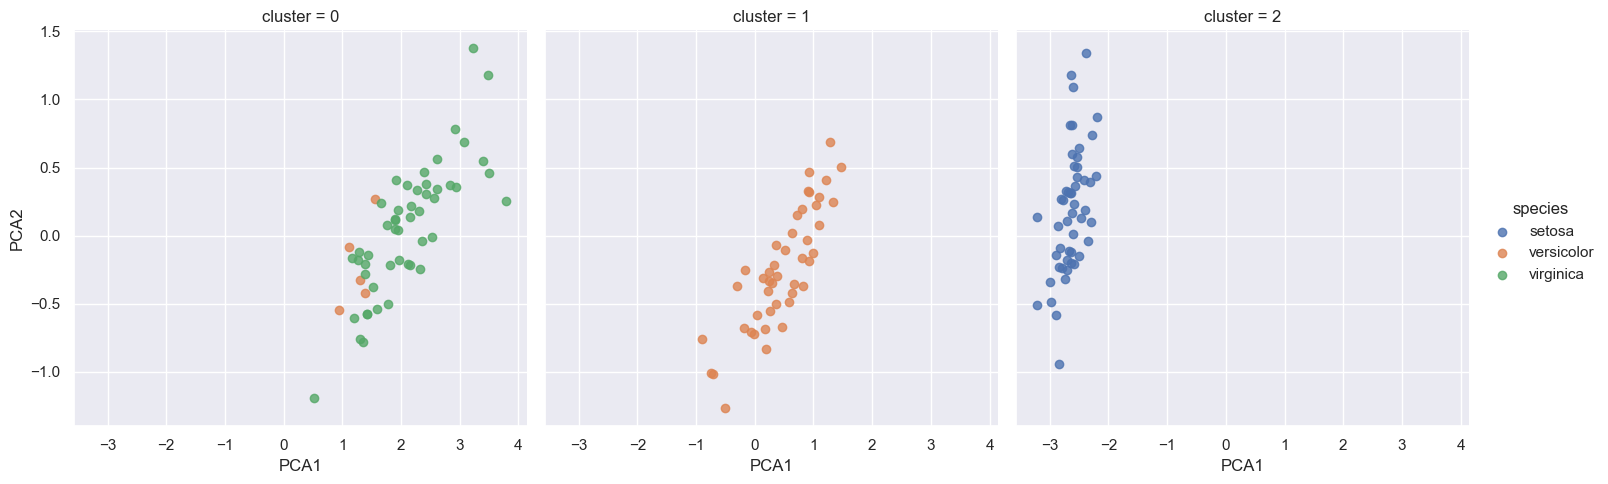

In [23]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 1, while there remains a small amount of mixing between versicolor and virginica. This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm! This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

# Application: Exploring Hand-written Digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits. In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

In [24]:
from sklearn.datasets import load_digits

digits = load_digits()

digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. Let's visualize the first hundred of these:

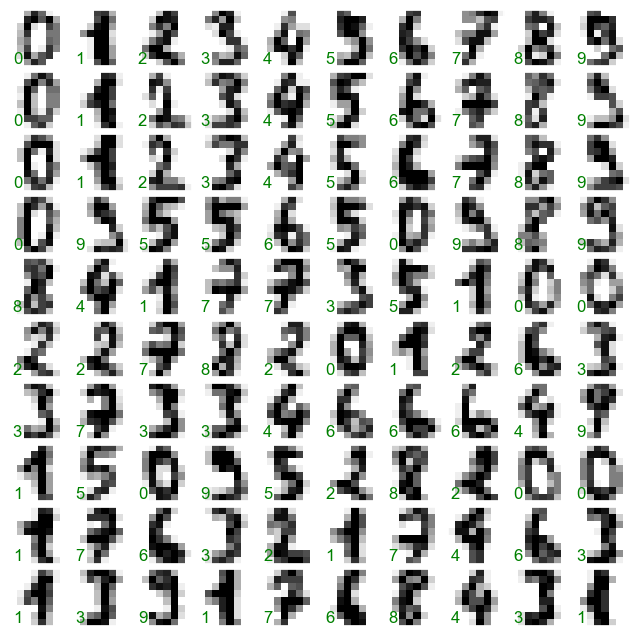

In [25]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),                    # Creates a grid of subplots with 10 rows and 10 columns.
                         subplot_kw={'xticks':[], 'yticks':[]},     # Removes x-ticks and y-ticks from all subplots.
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))  # Set the horizontal and vertical spacing between subplots to 0.1.

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') # Displays the i-th image from the digits dataset in the current subplot (ax).
    ax.text(0.05, 0.05, str(digits.target[i]),                          # Adds text to the subplot.
            transform=ax.transAxes, color='green')                      # Ensures that the text position is relative to the subplot's coordinate system.

In order to work with this data within Scikit-Learn, we need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively:

In [26]:
X = digits.data

X.shape

(1797, 64)

In [27]:
y = digits.target

y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space. Instead we'll reduce the dimensions to 2, using an unsupervised method. Here, we'll make use of a manifold learning algorithm called Isomap, and transform the data to two dimensions:

In [28]:
from sklearn.manifold import Isomap

# During the fit process, Isomap computes the geodesic distances between samples and learns a lower-dimensional embedding of the data.

iso = Isomap(n_components=2)    # The data should be reduced to 2 dimensions

iso.fit(digits.data)            # Fits the Isomap model to the digits.data.

data_projected = iso.transform(digits.data)  # Will be a matrix where each row represents a sample in the new 2D feature space.

data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional. Let's plot this data to see if we can learn anything from its structure:

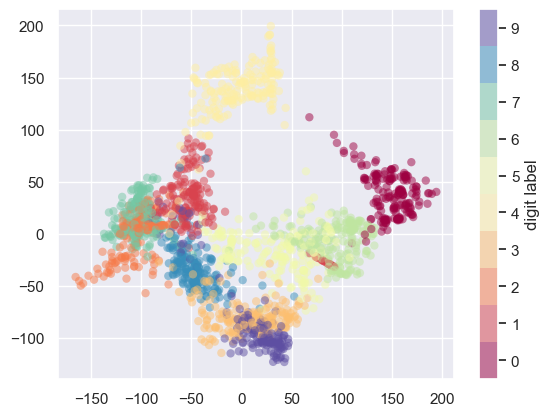

In [29]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))  # Use 'Spectral' instead of 'spectral'

plt.colorbar(label='digit label', ticks=range(10))

plt.clim(-0.5, 9.5)

#### Explanation:

1. plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))

* `data_projected[:, 0]`: X-coordinates for the scatter plot.
* `data_projected[:, 1]`: Y-coordinates for the scatter plot.
* `c=digits.target`: Color of each point based on the digit label.
* `edgecolor='none'`: Removes the border around each point.
* `alpha=0.5`: Makes the points semi-transparent.
* `cmap=plt.cm.get_cmap('Spectral', 10)`: Uses the 'Spectral' colormap with 10 discrete colors.

2. plt.colorbar(label='digit label', ticks=range(10))

* Adds a colorbar to the plot to show the mapping from colors to digit labels.
* `label='digit label'`: Label for the colorbar.
* `ticks=range(10)`: Sets the ticks on the colorbar to match the digit labels.

3. plt.clim(-0.5, 9.5)

Sets the color limits of the plot so that the color mapping spans from -0.5 to 9.5. This ensures that the colorbar aligns correctly with the digit labels.

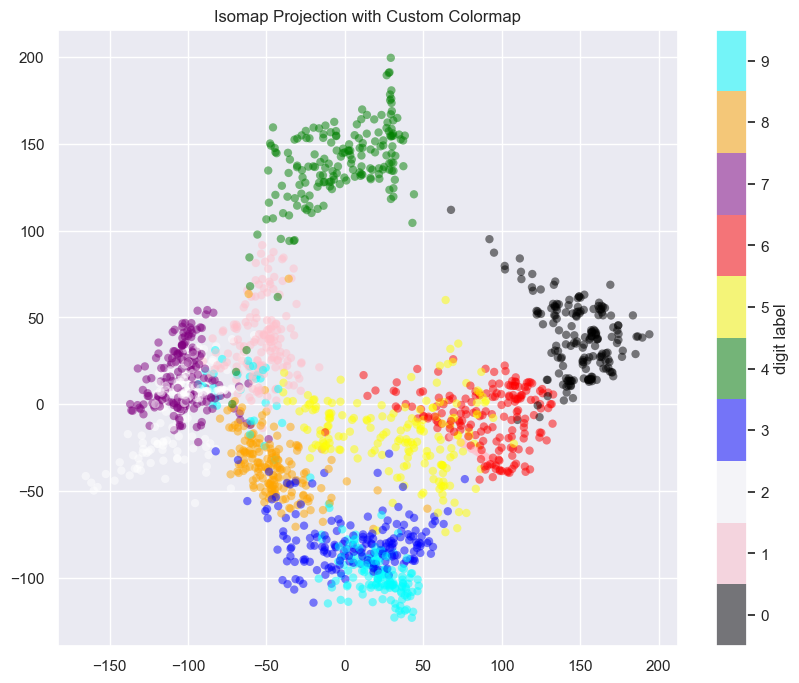

In [30]:
import matplotlib.colors as mcolors

# Define a custom colormap
colors = ['black', 'pink', 'white', 'blue', 'green', 'yellow', 'red', 'purple', 'orange', 'cyan']
cmap_name = 'custom_black_white_vivid'
custom_cmap = mcolors.ListedColormap(colors)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
                      edgecolor='none', alpha=0.5, cmap=custom_cmap)
plt.colorbar(scatter, label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title('Isomap Projection with Custom Colormap')
plt.show()

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in black) and ones (in pink) have very little overlap in parameter space. Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle. On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.

Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data. Let's give it a try.

### Classification on digits

Let's apply a classification algorithm to the digits. As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [32]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()            # Create an instance of the Gaussian Naive Bayes model

model.fit(Xtrain, ytrain)       # Train the model using the training data (Xtrain) and labels (ytrain)

y_model = model.predict(Xtest)  # Use the trained model to predict labels for the test data (Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits! However, this single number doesn't tell us where we've gone wrong—one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn:

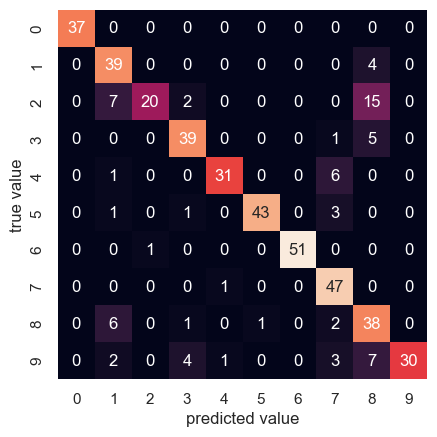

In [34]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)

plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights. Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We'll use green for correct labels, and red for incorrect labels:

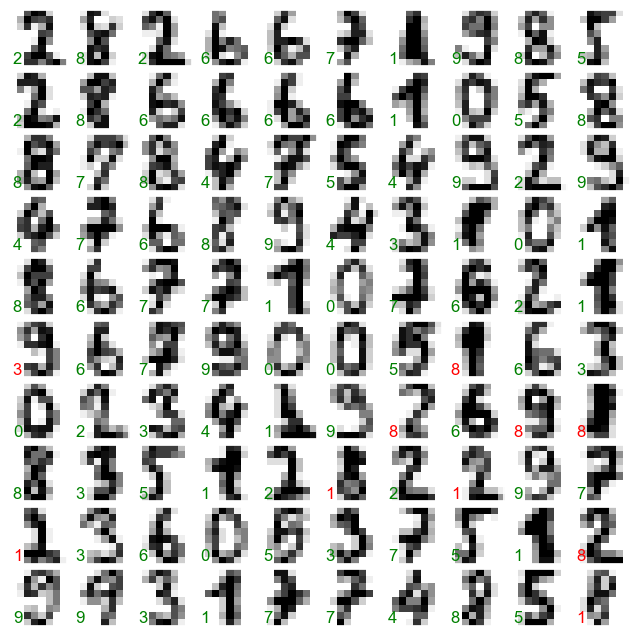

In [35]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally. To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines, random forests or another classification approach.